In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import LocalOutlierFactor

In [2]:
haberman_data=pd.read_csv("C:/Users/szymo/Downloads/haberman.data")

In [8]:
haberman_data.describe()

,age,operation,nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
haberman_data.head()

,age,operation,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


C:\Users\szymo\AppData\Local\Temp\ipykernel_21592\3974787786.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


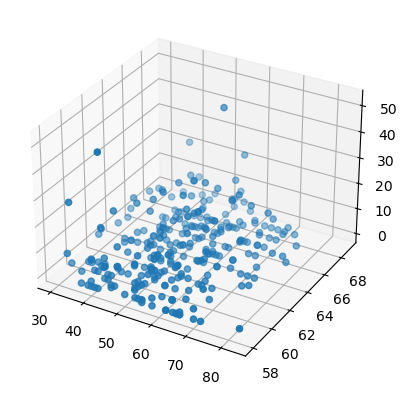

In [16]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(haberman_data['age'], haberman_data['operation'], haberman_data['nodes'])

In [29]:
def find_outliers(data):
    #empty list to accomodate outliers 
    outliers = []
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data,axis=0)
    data_mean = np.mean(data,axis=0)
    outliers_cut_off = data_std * 3
    
    lower_limit  = data_mean - outliers_cut_off 
    upper_limit = data_mean + outliers_cut_off
    
    # Locate outliers
    for outlier_to_test in data:
        if (outlier_to_test > upper_limit).any() or (outlier_to_test < lower_limit).any():
            outliers.append(outlier_to_test)
    return outliers

In [3]:
data_unlabelled=haberman_data.drop('survived',axis='columns')

In [30]:
find_outliers(data_unlabelled.to_numpy())

[array([34, 58, 30], dtype=int64),
 array([43, 58, 52], dtype=int64),
 array([54, 67, 46], dtype=int64),
 array([59, 62, 35], dtype=int64),
 array([63, 61, 28], dtype=int64)]

In [4]:
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.01)

In [5]:
y_pred = clf.fit_predict(data_unlabelled)

In [8]:
outliers = np.where(y_pred == -1)[0]
print("Outliers:", outliers)

Outliers: [  9  62 174 305]


In [10]:
print(data_unlabelled.iloc[outliers,:])

     age  operation  nodes
9     34         58     30
62    43         58     52
174   54         67     46
305   83         58      2
